In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os

In [14]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 40.3 MB/s eta 0:00:00


In [15]:
!pip install nvidia-cudnn-cu11==8.6.0.163 tensorflow==2.14.*
import tensorflow as tf
import tensorflow_models as tfm
import tensorflow_hub as hub
import tensorflow_datasets as tfds

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.7/715.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
 

In [16]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
%matplotlib inline

In [17]:
pretrain_dir = "/content/drive/Shareddrives/Human protein interaction project/interaction/pretrained_models"
tf.io.gfile.listdir(pretrain_dir)
max_length=512

In [18]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 2.7 MB/s eta 0:00:00


In [19]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained(pretrain_dir)

In [20]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=max_length)

In [21]:
virus_train_csv = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/virus/", "train.tsv"), sep='\t')
malaria_train_csv = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/malaria/", "train.tsv"), sep='\t')
bacteria_train_csv = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/bacteria/", "train2.tsv"), sep='\t')
virus_train2_csv = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/virus/", "train2.tsv"), sep='\t')

In [22]:
virus_dev_csv = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/virus/", "dev.tsv"), sep='\t')
bacteria_dev_csv = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/bacteria/", "dev2.tsv"), sep='\t')
malaria_dev_csv = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/malaria/", "dev.tsv"), sep='\t')
virus_dev2_csv = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/virus/", "dev2.tsv"), sep='\t')

In [23]:
virus_test_csv = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/virus/", "test.tsv"), sep='\t')
bacteria_test_csv = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/bacteria/", "test2.tsv"), sep='\t')
malaria_test_csv = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/malaria/", "test.tsv"), sep='\t')
virus_test2_csv = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/virus/", "test2.tsv"), sep='\t')

In [24]:
virus_train_text = virus_train_csv['text'].tolist()
virus_train_abs = virus_train_csv['abstract'].tolist()
virus_train_lbl = virus_train_csv['label'].tolist()

virus_dev_text = virus_dev_csv['text'].tolist()
virus_dev_abs = virus_dev_csv['abstract'].tolist()
virus_dev_lbl = virus_dev_csv['label'].tolist()

virus_test_text = virus_test_csv['text'].tolist()
virus_test_abs = virus_test_csv['abstract'].tolist()
virus_test_lbl = virus_test_csv['label'].tolist()

In [25]:
bacteria_train_text = bacteria_train_csv['text'].tolist()
bacteria_train_abs = bacteria_train_csv['abstract'].tolist()
bacteria_train_lbl = bacteria_train_csv['label'].tolist()

bacteria_dev_text = bacteria_dev_csv['text'].tolist()
bacteria_dev_abs = bacteria_dev_csv['abstract'].tolist()
bacteria_dev_lbl = bacteria_dev_csv['label'].tolist()

bacteria_test_text = bacteria_test_csv['text'].tolist()
bacteria_test_abs = bacteria_test_csv['abstract'].tolist()
bacteria_test_lbl = bacteria_test_csv['label'].tolist()

In [26]:
virus_train2_text = virus_train2_csv['text'].tolist()
virus_train2_abs = virus_train2_csv['abstract'].tolist()
virus_train2_lbl = virus_train2_csv['label'].tolist()

virus_dev2_text = virus_dev2_csv['text'].tolist()
virus_dev2_abs = virus_dev_csv['abstract'].tolist()
virus_dev2_lbl = virus_dev_csv['label'].tolist()

virus_test2_text = virus_test2_csv['text'].tolist()
virus_test2_abs = virus_test2_csv['abstract'].tolist()
virus_test2_lbl = virus_test2_csv['label'].tolist()

In [27]:
malaria_train_text = malaria_train_csv['text'].tolist()
malaria_train_abs = malaria_train_csv['abstract'].tolist()
malaria_train_lbl = malaria_train_csv['label'].tolist()

malaria_dev_text = malaria_dev_csv['text'].tolist()
malaria_dev_abs = malaria_dev_csv['abstract'].tolist()
malaria_dev_lbl = malaria_dev_csv['label'].tolist()

malaria_test_text = malaria_test_csv['text'].tolist()
malaria_test_abs = malaria_test_csv['abstract'].tolist()
malaria_test_lbl = malaria_test_csv['label'].tolist()

In [28]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.4 MB/s eta 0:00:00


In [29]:
from datasets.dataset_dict import DatasetDict
from datasets import Dataset

In [30]:
virus_dataset = DatasetDict({
    'train':Dataset.from_dict({'id':virus_train_abs, 'label':virus_train_lbl, 'text':virus_train_text}),
    'val':Dataset.from_dict({'id':virus_dev_abs,'label':virus_dev_lbl, 'text':virus_dev_text}),
    'test':Dataset.from_dict({'id':virus_test_abs,'label':virus_test_lbl, 'text':virus_test_text})
})

bacteria_dataset = DatasetDict({
    'train':Dataset.from_dict({'id':bacteria_train_abs, 'label':bacteria_train_lbl, 'text':bacteria_train_text}),
    'val':Dataset.from_dict({'id':bacteria_dev_abs,'label':bacteria_dev_lbl, 'text':bacteria_dev_text}),
    'test':Dataset.from_dict({'id':bacteria_test_abs,'label':bacteria_test_lbl, 'text':bacteria_test_text})
})

virus2_dataset = DatasetDict({
    'train':Dataset.from_dict({'id':virus_train2_abs, 'label':virus_train2_lbl, 'text':virus_train2_text}),
    'val':Dataset.from_dict({'id':virus_dev2_abs,'label':virus_dev2_lbl, 'text':virus_dev2_text}),
    'test':Dataset.from_dict({'id':virus_test2_abs,'label':virus_test2_lbl, 'text':virus_test2_text})
})

malaria_dataset = DatasetDict({
    'train':Dataset.from_dict({'id':malaria_train_abs, 'label':malaria_train_lbl, 'text':malaria_train_text}),
    'val':Dataset.from_dict({'id':malaria_dev_abs,'label':malaria_dev_lbl, 'text':malaria_dev_text}),
    'test':Dataset.from_dict({'id':malaria_test_abs,'label':malaria_test_lbl, 'text':malaria_test_text})
})

In [31]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(pretrain_dir, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/Shareddrives/Human protein interaction project/interaction/pretrained_models and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
!pip install --upgrade tf-nightly tfp-nightly
!pip install --upgrade evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.9/566.9 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
ERROR: pip's dependency resolver does not currently t

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.2 MB/s eta 0:00:00


In [33]:
import numpy as np

In [34]:
import evaluate

metric = evaluate.load("f1")

In [35]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [36]:
!pip install accelerate -U

In [37]:
from transformers import TrainingArguments, Trainer, get_linear_schedule_with_warmup
from torch.optim import Adam

training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", per_device_train_batch_size=4, per_device_eval_batch_size=4, num_train_epochs=5)

In [38]:
tokenized_datasets = virus_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/2222 [00:00<?, ? examples/s]

Map:   0%|          | 0/740 [00:00<?, ? examples/s]

Map:   0%|          | 0/740 [00:00<?, ? examples/s]

In [39]:
#tokenized_datasets = bacteria_dataset.map(tokenize_function, batched=True)

In [40]:
tokenized_datasets = malaria_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/946 [00:00<?, ? examples/s]

Map:   0%|          | 0/316 [00:00<?, ? examples/s]

Map:   0%|          | 0/316 [00:00<?, ? examples/s]

In [41]:
tokenized_datasets = virus2_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/2222 [00:00<?, ? examples/s]

Map:   0%|          | 0/740 [00:00<?, ? examples/s]

Map:   0%|          | 0/740 [00:00<?, ? examples/s]

In [42]:
train_dataset = tokenized_datasets["train"].shuffle(seed=42)
eval_dataset = tokenized_datasets["val"].shuffle(seed=42)
test_dataset = tokenized_datasets["test"].shuffle(seed=42)

In [44]:
optimizer = Adam(params=model.parameters(), lr=1e-05, eps=1e-08)
scheduler = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=0, num_training_steps=1668
)


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    optimizers=(optimizer,scheduler),
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1
1,0.082400,0.301615,0.920152
2,0.078600,0.301615,0.920152
3,0.080900,0.301615,0.920152
4,0.082300,0.301615,0.920152
5,0.064500,0.301615,0.920152


TrainOutput(global_step=2780, training_loss=0.08494759429272988, metrics={'train_runtime': 4151.3077, 'train_samples_per_second': 2.676, 'train_steps_per_second': 0.67, 'total_flos': 1.035375744657408e+16, 'train_loss': 0.08494759429272988, 'epoch': 5.0})

In [ ]:
trainer.evaluate(test_dataset)

{'eval_loss': 0.284233421087265,
 'eval_f1': 0.941678520625889,
 'eval_runtime': 79.8159,
 'eval_samples_per_second': 9.271,
 'eval_steps_per_second': 2.318,
 'epoch': 5.0}

In [ ]:
predictions = trainer.predict(test_dataset)
predictions

PredictionOutput(predictions=array([[ 5.078663 , -3.5934005],
       [-3.2017438,  2.0442815],
       [ 4.2214055, -3.0463216],
       ...,
       [ 5.114803 , -3.7477334],
       [ 5.2118325, -3.6238823],
       [-3.2647655,  2.0530665]], dtype=float32), label_ids=array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
    

In [48]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [ ]:
predictions.predictions
output = []
for prediction in predictions.predictions:
  output.append(sigmoid(prediction[1]))

true_labels = predictions.label_ids
predicted_probs = np.array(output)

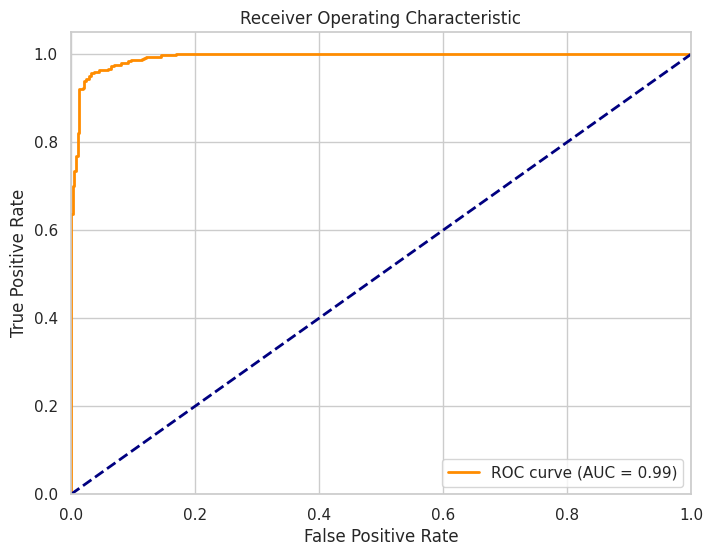

In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
roc_auc = roc_auc_score(true_labels, predicted_probs)

# Create a Seaborn ROC curve plot
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
df = pd.DataFrame({"predicted": predicted_probs, "actual": true_labels})
df.to_csv("/content/drive/Shareddrives/Human protein interaction project/interaction/bluebert_test.csv")

In [60]:
df = pd.read_csv("/content/drive/Shareddrives/Human protein interaction project/interaction/bluebert_test.csv")

In [59]:
mlp_df = pd.read_csv("/content/drive/Shareddrives/Human protein interaction project/interaction/test_pred.csv")

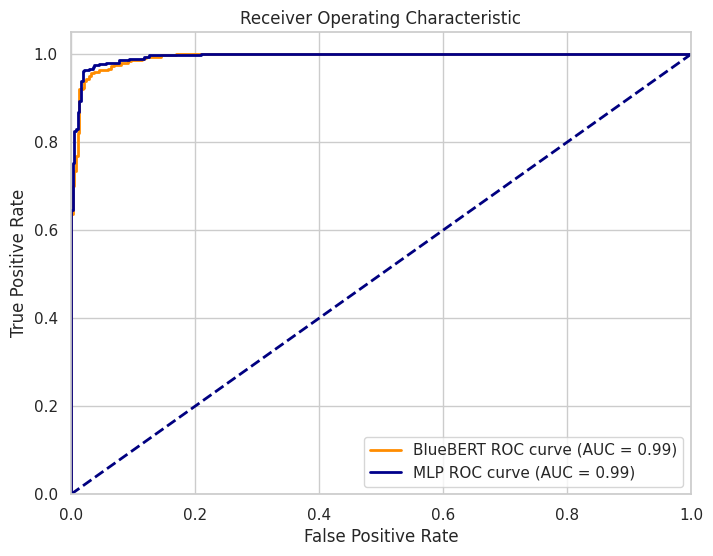

In [62]:
# Calculate ROC curve and AUC
predicted_labels_bluebert = df['predicted'].values.tolist()
true_labels_bluebert = df['actual'].values.tolist()

predicted_labels_mlp = mlp_df['predicted'].values.tolist()
true_labels_mlp = mlp_df['actual'].values.tolist()

fpr, tpr, thresholds = roc_curve(true_labels_bluebert, predicted_labels_bluebert)
roc_auc = roc_auc_score(true_labels_bluebert, predicted_labels_bluebert)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(true_labels_mlp, predicted_labels_mlp)
roc_auc_mlp = roc_auc_score(true_labels_mlp, predicted_labels_mlp)

# Create a Seaborn ROC curve plot
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'BlueBERT ROC curve (AUC = {roc_auc:.2f})')
plt.plot(fpr_mlp, tpr_mlp, color='darkblue', lw=2, label=f'MLP ROC curve (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
trainer.save_model("/content/drive/Shareddrives/Human protein interaction project/interaction/trained/virus/")

In [ ]:
trainer.save_model("/content/drive/Shareddrives/Human protein interaction project/interaction/trained/virus/virus2")

In [ ]:
trainer.save_model("/content/drive/Shareddrives/Human protein interaction project/interaction/trained/bacteria/")

In [45]:
model = BertForSequenceClassification.from_pretrained("/content/drive/Shareddrives/Human protein interaction project/interaction/trained/virus/", num_labels=2)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    optimizers=(optimizer,scheduler)
)

In [ ]:
model = BertForSequenceClassification.from_pretrained("/content/drive/Shareddrives/Human protein interaction project/interaction/trained/bacteria/", num_labels=2)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    optimizers=(optimizer,scheduler)
)

In [ ]:
recap_csv = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/virus/", "test_recap.tsv"), sep='\t')

recap_text = recap_csv['text'].tolist()
recap_abs = recap_csv['abstract'].tolist()
recap_fn = recap_csv['file_name'].tolist()

recap_dataset = DatasetDict({
    'test':Dataset.from_dict({'id':recap_abs, 'filename':recap_fn, 'text':recap_text}),
})
tokenized_recap_dataset = recap_dataset.map(tokenize_function, batched=False)
recap_dataset = tokenized_recap_dataset["test"]
predictions = trainer.predict(recap_dataset)

Map:   0%|          | 0/51824 [00:00<?, ? examples/s]

In [ ]:
new_csv = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/virus/", "test_new.tsv"), sep='\t')

new_text = new_csv['text'].tolist()
new_abs = new_csv['abstract'].tolist()
new_fn = new_csv['file_name'].tolist()

new_dataset = DatasetDict({
    'test':Dataset.from_dict({'id':new_abs, 'filename':new_fn, 'text':new_text}),
})
tokenized_new_dataset = new_dataset.map(tokenize_function, batched=False)
new_dataset = tokenized_new_dataset["test"]
predictions = trainer.predict(new_dataset)

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
new_csv = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/bacteria/", "test_new.tsv"), sep='\t')

new_text = new_csv['text'].tolist()
new_abs = new_csv['abstract'].tolist()
new_fn = new_csv['file_name'].tolist()

new_dataset = DatasetDict({
    'test':Dataset.from_dict({'id':new_abs, 'filename':new_fn, 'text':new_text}),
})
tokenized_new_dataset = new_dataset.map(tokenize_function, batched=False)
new_dataset = tokenized_new_dataset["test"]
predictions = trainer.predict(new_dataset)

Map:   0%|          | 0/18192 [00:00<?, ? examples/s]

In [46]:
transfer_text = malaria_train_text + malaria_dev_text + malaria_test_text
transfer_abs = malaria_train_abs + malaria_dev_abs + malaria_test_abs
transfer_lbl = malaria_train_lbl + malaria_dev_lbl + malaria_test_lbl

transfer_dataset = DatasetDict({
    'test':Dataset.from_dict({'id':transfer_abs,'label':transfer_lbl, 'text':transfer_text})
})
tokenized_transfer_dataset = transfer_dataset.map(tokenize_function, batched=False)
transfer_dataset = tokenized_transfer_dataset["test"]
predictions = trainer.predict(transfer_dataset)

Map:   0%|          | 0/1578 [00:00<?, ? examples/s]

In [49]:
output = []
for prediction in predictions.predictions:
  output.append(sigmoid(prediction[1]))

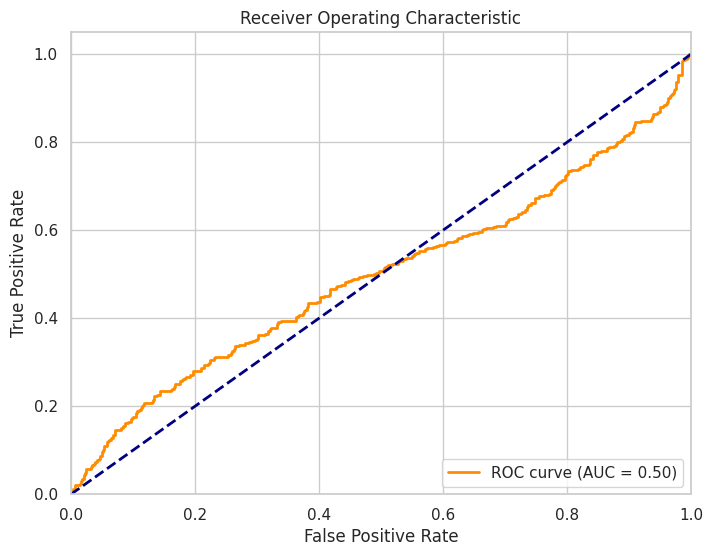

In [50]:
true_labels = predictions.label_ids
predicted_probs = np.array(output)

fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
roc_auc = roc_auc_score(true_labels, predicted_probs)

# Create a Seaborn ROC curve plot
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [51]:
df_content = list(zip(transfer_abs, output, transfer_lbl))
df = pd.DataFrame(df_content, columns=['Abstract IDs', 'Transfer Score', 'True Label'])
df.to_csv("/content/drive/Shareddrives/Human protein interaction project/interaction/transfer_malaria.csv")

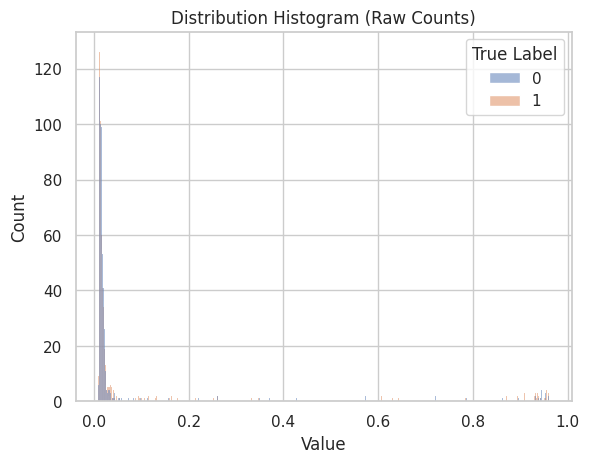

In [52]:
df = pd.read_csv("/content/drive/Shareddrives/Human protein interaction project/interaction/transfer_malaria.csv")
output = df['Transfer Score'].tolist()
true = df['True Label'].tolist()
sns.histplot(df, x='Transfer Score', hue='True Label',kde=False)  # kde=False disables the Kernel Density Estimation plot
plt.xlabel('Value')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.title('Distribution Histogram (Raw Counts)')  # Title of the plot

# Display the plot
plt.show()


Text(0.5, 1.0, 'Confusion Matrix')

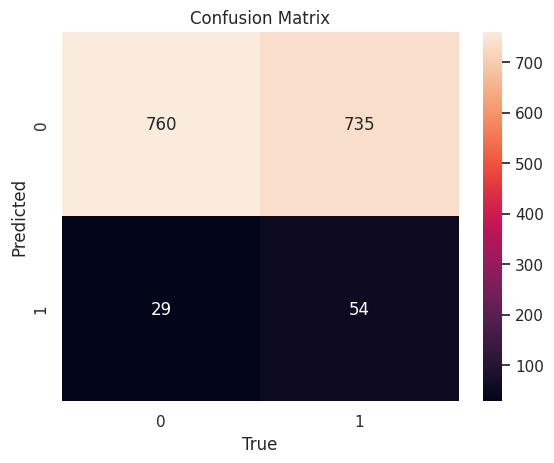

In [53]:
from sklearn.metrics import confusion_matrix

output = np.array(output) > 0.5
true = np.array(true) > 0.5
cm = confusion_matrix(output, true)

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

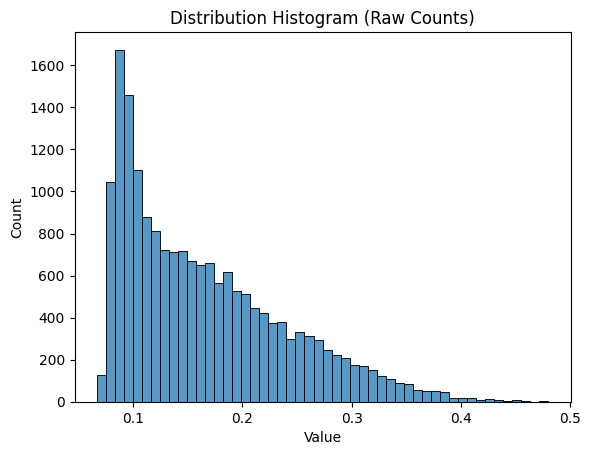

In [ ]:
# Create a histogram using Seaborn without smoothing
sns.histplot(output, kde=False)  # kde=False disables the Kernel Density Estimation plot
plt.xlabel('Value')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.title('Distribution Histogram (Raw Counts)')  # Title of the plot

# Display the plot
plt.show()

In [ ]:
df_content = list(zip(recap_fn, output))
df = pd.DataFrame(df_content, columns=['Pubmed IDs', 'score'])
df.to_csv("/content/drive/Shareddrives/Human protein interaction project/interaction/recap.csv")

In [ ]:
df_content = list(zip(new_fn, output))
df = pd.DataFrame(df_content, columns=['Pubmed IDs', 'score'])
df.to_csv("/content/drive/Shareddrives/Human protein interaction project/interaction/bacteria/new.csv")

In [8]:
df = pd.read_csv("/content/drive/Shareddrives/Human protein interaction project/interaction/virus/recap.csv")

In [9]:
len(df[df['score'] >= 0.9])/len(df[df['score'] <= 0.1])

0.10500346067114694

In [ ]:
high_conf_df = df[df['score'] > 0.9]
high_conf_df.to_csv("/content/drive/Shareddrives/Human protein interaction project/interaction/recap_high_confidence.csv")

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/Human protein interaction project/interaction/virus/new.csv")

In [ ]:
len(df[df['score'] >= 0.9])/len(df[df['score'] <= 0.1])

0.016881111682964488

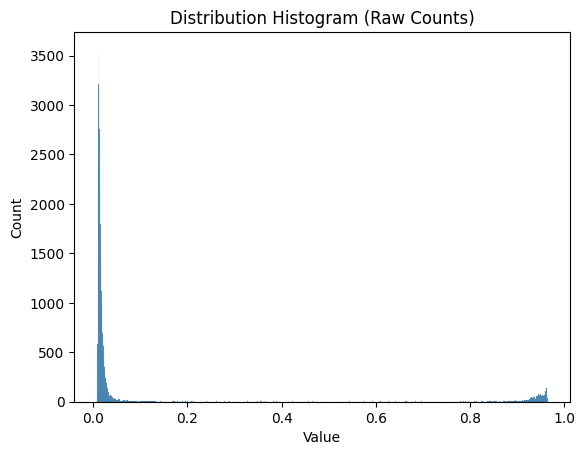

In [11]:
sns.histplot(df, x='score', kde=False)  # kde=False disables the Kernel Density Estimation plot
plt.xlabel('Value')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.title('Distribution Histogram (Raw Counts)')  # Title of the plot

# Display the plot
plt.show()

In [ ]:
# compare scores
mlp_df = pd.read_csv("/content/drive/Shareddrives/Human protein interaction project/interaction/mlp_recap.csv")

output_df = mlp_df[['Pubmed IDs']].copy()

# Calculate the average of 'score1' through 'score10' for each row and store it in the 'score' column
output_df['score'] = mlp_df[['Trial 0 Predicted', 'Trial 1 Predicted', 'Trial 2 Predicted', 'Trial 3 Predicted', 'Trial 4 Predicted', 'Trial 5 Predicted', 'Trial 6 Predicted', 'Trial 7 Predicted', 'Trial 8 Predicted', 'Trial 9 Predicted']].mean(axis=1)

output_df

,Pubmed IDs,score
0,28429836.txt,0.009844
1,36812628.txt,0.002577
2,17047910.txt,0.007024
3,35632724.txt,0.077883
4,36797452.txt,0.014428
...,...,...
27007,22258239.txt,0.846655
27008,28787457.txt,0.759087
27009,35706371.txt,0.012896
27010,14614141.txt,0.168444


In [ ]:
# compare scores
mlp_df = pd.read_csv("/content/drive/Shareddrives/Human protein interaction project/interaction/mlp_new.csv")

output_df = mlp_df[['Pubmed IDs']].copy()

# Calculate the average of 'score1' through 'score10' for each row and store it in the 'score' column
output_df['score'] = mlp_df[['Trial 0 Predicted', 'Trial 1 Predicted', 'Trial 2 Predicted', 'Trial 3 Predicted', 'Trial 4 Predicted', 'Trial 5 Predicted', 'Trial 6 Predicted', 'Trial 7 Predicted', 'Trial 8 Predicted', 'Trial 9 Predicted']].mean(axis=1)

output_df

,Pubmed IDs,score
0,28429836.txt,0.008706
1,18083897.txt,0.081184
2,32629531.txt,0.001448
3,22871633.txt,0.231296
4,11479207.txt,0.039103
...,...,...
25939,8895769.txt,0.153091
25940,14614141.txt,0.248673
25941,34082771.txt,0.095544
25942,22806397.txt,0.005919


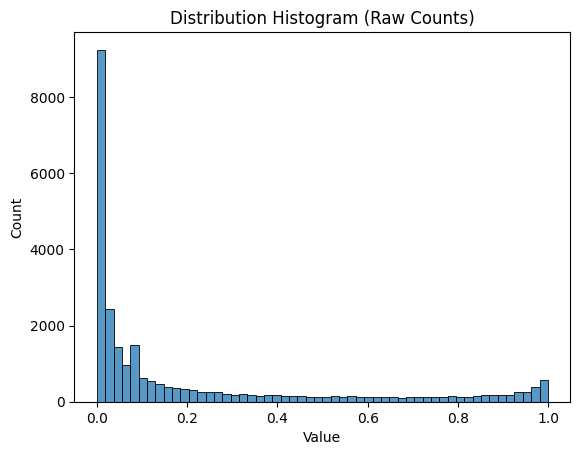

In [ ]:
# Create a histogram using Seaborn without smoothing
sns.histplot(output_df['score'].tolist(), kde=False)  # kde=False disables the Kernel Density Estimation plot
plt.xlabel('Value')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.title('Distribution Histogram (Raw Counts)')  # Title of the plot

# Display the plot
plt.show()

In [ ]:
merged_df = df.merge(output_df, on='Pubmed IDs', suffixes=('_bluebert', '_mlp'), how='inner')
merged_df[(merged_df['score_bluebert'] < 0.5) & (merged_df['score_mlp'] > 0.5)]
merged_df.to_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/", "recap_comparison.tsv"), sep='\t')

NameError: ignored

In [ ]:
merged_df = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/", "recap_comparison.tsv"), sep='\t')

In [ ]:
disagree_df = merged_df[(merged_df['score_mlp'] > 0.6) & (merged_df['score_bluebert'] < 0.1)]
disagree_df.to_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/", "disagree_recap.tsv"), sep='\t')

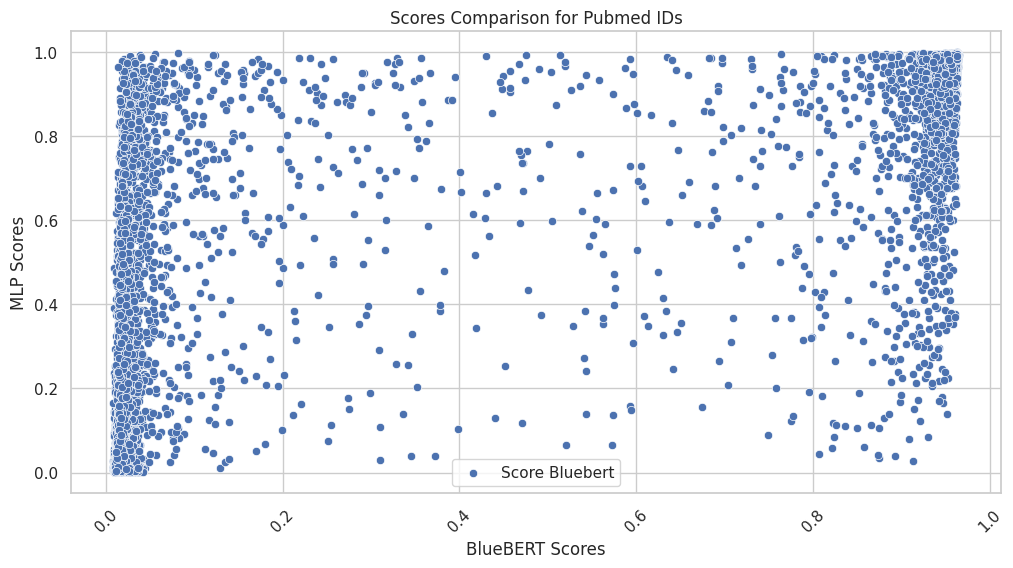

In [ ]:
filename_col = 'Pubmed IDs'
score1_col = 'score_bluebert'
score2_col = 'score_mlp'
#dataframe = merged_df.sample(frac=1/100, random_state=42)
dataframe = merged_df.sample(n=10000, random_state=42)


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Use Seaborn's scatterplot function to create the plot
sns.scatterplot(data=dataframe, x=score1_col, y=score2_col, label='Score Bluebert', marker='o')

# Add labels and a legend
plt.xlabel("BlueBERT Scores")
plt.ylabel("MLP Scores")
plt.title(f'Scores Comparison for {filename_col}')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
merged_df = df.merge(output_df, on='Pubmed IDs', suffixes=('_bluebert', '_mlp'), how='inner')
merged_df[(merged_df['score_bluebert'] < 0.5) & (merged_df['score_mlp'] > 0.5)]
merged_df.to_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/", "new_comparison.tsv"), sep='\t')

In [ ]:
merged_df = pd.read_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/", "new_comparison.tsv"), sep='\t')

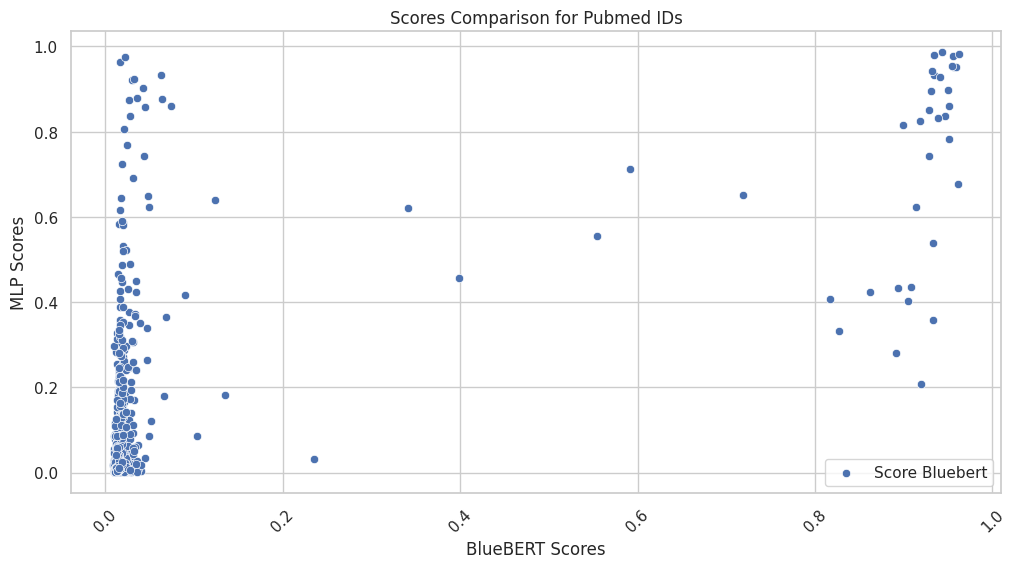

In [ ]:
filename_col = 'Pubmed IDs'
score1_col = 'score_bluebert'
score2_col = 'score_mlp'
#dataframe = merged_df.sample(frac=1/100, random_state=42)
dataframe = merged_df


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Use Seaborn's scatterplot function to create the plot
sns.scatterplot(data=dataframe, x=score1_col, y=score2_col, label='Score Bluebert', marker='o')

# Add labels and a legend
plt.xlabel("BlueBERT Scores")
plt.ylabel("MLP Scores")
plt.title(f'Scores Comparison for {filename_col}')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
disagree_df = merged_df[(merged_df['score_mlp'] > 0.6) & (merged_df['score_bluebert'] < 0.1)]
disagree_df.to_csv(os.path.join("/content/drive/Shareddrives/Human protein interaction project/interaction/", "disagree_new.tsv"), sep='\t')

In [ ]:
len(merged_df[merged_df['score_bluebert'] > 0.9])/len(merged_df[merged_df['score_bluebert'] < 0.1])

0.02905027932960894